# Heart disease Hungarian

### 1) Pengumpulan data

Mengumpulkan data dari dataset dari link *https://archive.ics.uci.edu/dataset/45/heart+disease*. Database yang disediakan terdapat 4 database. Dan yang akan digunakan adalah dataset dengan nama file ``hungarian.data`` saja.
Dari deskripsi dataset di file ``hearth-disease.name`` terdapat beberapa informasi yang dapat didapatkan. Yang diantaranya adalah di dalam dataset terdapat 76 atribut tetapi yang digunakan hanya 14. Tujuan dari dataset ini untuk melakukan klasifikasi adanya penyakit jantung pada pasien.


### 2) Menelaah data


Memasukkan library yang digunakan untuk menelaah data

In [1]:
import numpy as np
import pandas as pd
import re
import itertools

Membuka data dari drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/BK'
# !dir data

ask-detrano	costs		     long-beach-va.data        processed.switzerland.data  WARNING
bak		heart-disease.names  new.data		       processed.va.data
cleveland.data	hungarian.data	     processed.cleveland.data  reprocessed.hungarian.data
cleve.mod	Index		     processed.hungarian.data  switzerland.data


memasukkan dataset yang dibutuhkan dengan alamat dan simpan kedalam sebuah variable

In [6]:
dir = '/content/drive/MyDrive/BK/hungarian.data'
# dir = 'data/hungarian.data'

buat iterasi untuk membaca dataset

In [7]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:1]

['1254 0 40 1 1 0 0']

melakukan iterasi sesuai dengan jumlah kolom, dan baris yang ada pada dataset. Atribut yang ada di dataset terdapat 76. Jadi membuat iterasi untuk menggabungkan 76 atribut yang ada di 10 kolom menjadi satu baris sesuai dengan dataset yang ada di file `hungarian.data`. Kemudian disimpan kedalam DataFrame

In [8]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range (0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
293,5002,0,53,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,-9.,-9.,name


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

kondisi dataset yang dimiliki saat ini terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data  untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [10]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipedata file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [11]:
df = df.astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3) Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya. Di dalam dataset ini, nilai null nya dilambangkan dengan angka `-9.0`. Di tahap ini juga untuk mengetahui berapa banyak nilai nan.

Mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset.

In [13]:
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null value

In [14]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [15]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

### 4) Menentukan Objek Data

Sesuai dengan deskripsi dataset, fitur yang akan digunakan 14 fitur saja dari 76 fitur.

membuat variable dataframe baru untuk fitur mana saja yang akan digunakan.

Karena kolom dimulai dengan nilai 0, maka

In [17]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [18]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [19]:
df_selected.tail()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0
293,53.0,1.0,4.0,130.0,182.0,0.0,0.0,148.0,0.0,0.0,NaN,NaN,NaN,0.0


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [21]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}

In [22]:
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-22-e9a4003b4301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [24]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

### 5) Membersihkan Data

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

menghitung jumlah null values yang ada di dalam dataset

In [25]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [26]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [27]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['thalach'].dropna()
meanthalach = df_selected['restecg'].dropna()
meanexang = df_selected['exang'].dropna()

In [28]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)


In [29]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [30]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [31]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [32]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Melakukan pengecekan terhadap duplikasi data

In [33]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [34]:
print("All duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [35]:
dfClean = dfClean.drop_duplicates()
print("All duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [36]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [37]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur

In [39]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.056645,-0.435788,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,0.029697,-0.069999,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.121583,-0.328200,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.025111,-0.172258,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.042499,-0.132148,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,-0.013116,-0.060751,0.115503,0.063179,0.154319
restecg,0.056645,0.029697,-0.121583,0.025111,0.042499,-0.013116,1.000000,-0.007590,-0.036309,-0.035504,0.106794
thalach,-0.435788,-0.069999,-0.328200,-0.172258,-0.132148,-0.060751,-0.007590,1.000000,-0.366032,-0.313698,-0.335178
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,-0.036309,-0.366032,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,-0.035504,-0.313698,0.624965,1.000000,0.580732


<Axes: >

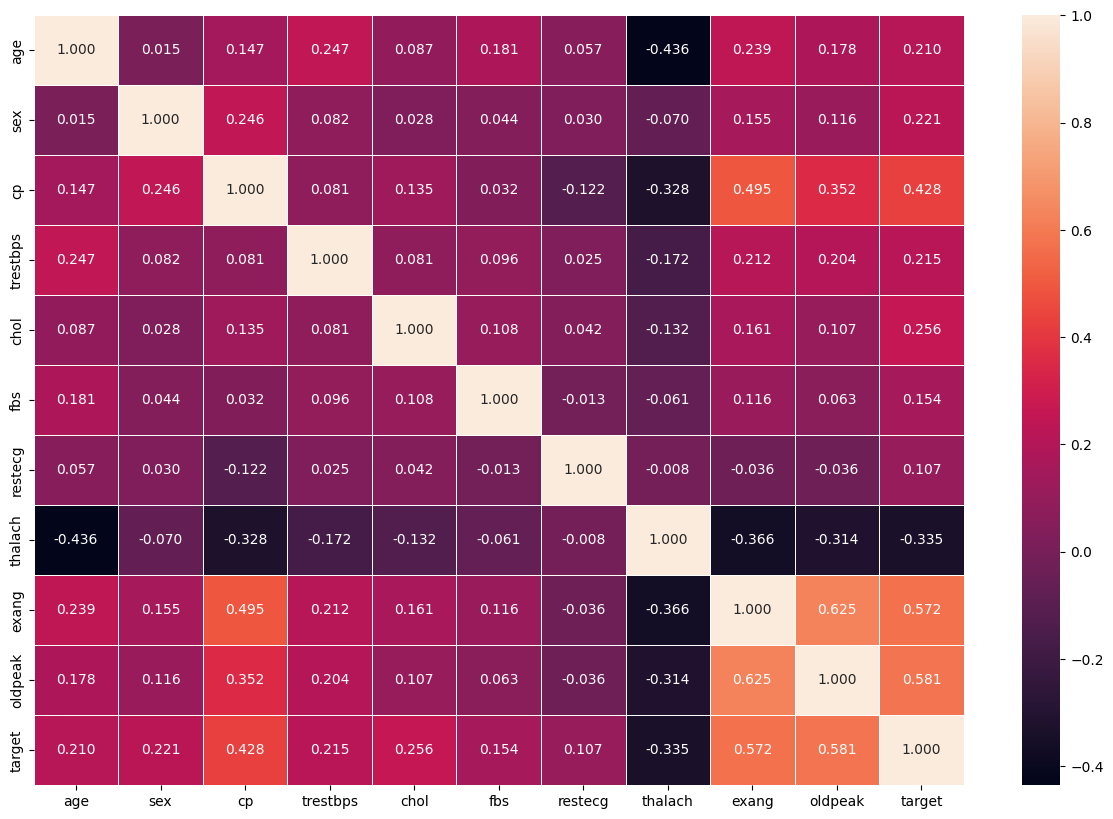

In [40]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

### 6) Konstruksi data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [41]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


Setelah Menyesuaikan tipe dataset kita , kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [42]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Setelah kita memisahkan antara fitur dan target , sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target terlebih dahulu.

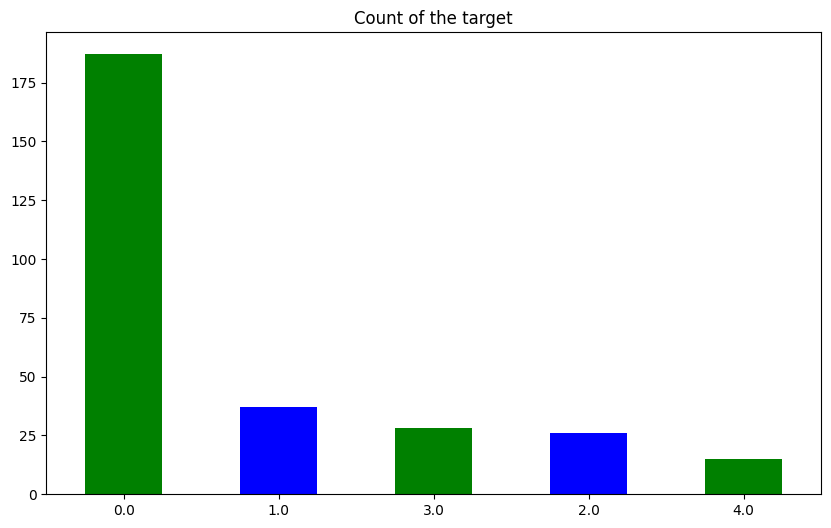

In [43]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);


Grafik diatas persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu dengan 2 cara yaitu `Oversampling` dan `Undersampling`.

Oversampling merupakan teknik dari pengolahan data untuk mengatasi ketidakseimbangan kelas dalam dataset.
Oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.
Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak.
Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE


Mengimport SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)


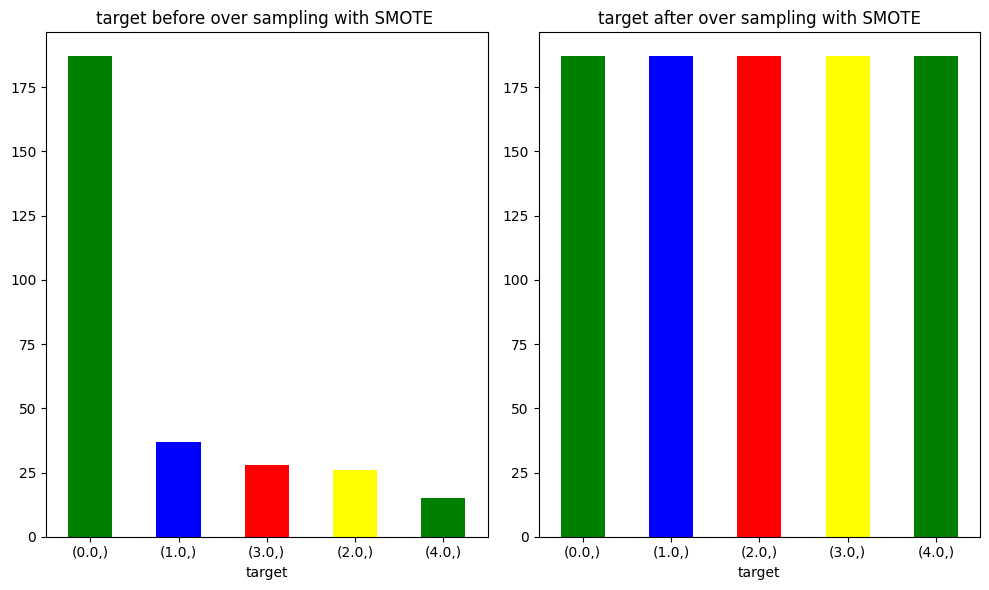

In [46]:
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()

plt.show()


Grafik diatas merupakan perbedaan grafik yang setelah di oversampling menggunakan SMOTE dengan grafik yang belum di Oversampling sehingga menjadi lebih seimbang

In [47]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [48]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada datset kita.

In [49]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.692833,138.583618,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,8.120740,24.919404,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,139.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

In [51]:
len(X_smote_resampled_normal)

935

In [52]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.564357,0.840186,0.824798,0.402636,0.340689,0.100558,0.005441,0.688406,0.602792,0.227237
std,0.175408,0.334488,0.267334,0.146547,0.111430,0.260380,0.054112,0.114710,0.450221,0.200967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473684,1.000000,0.666667,0.304885,0.267954,0.000000,0.000000,0.608065,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387129,0.330116,0.000000,0.000000,0.681709,0.981841,0.201816
75%,0.684211,1.000000,1.000000,0.485742,0.391913,0.000000,0.003267,0.771034,1.000000,0.385237
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah melakukan normalisasi, standar deviasi menjadi lebih sedikit rentangnya.

Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [55]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

### 7) Modeling

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.


In [56]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3), 'recall': round(rcl,3),
                    'F1 score': round(f1,3),
                    'Precision score': round(ps,3)
                    }

    return print(metric_dict)


### Oversample

### KNN

Tahap ini memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [58]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [59]:
y_pred_knn = knn_model.predict(X_test) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.743
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.29      0.39        38
         1.0       0.71      0.81      0.76        37
         2.0       0.77      0.89      0.82        37
         3.0       0.75      0.87      0.80        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.74       187
   macro avg       0.73      0.75      0.72       187
weighted avg       0.73      0.74      0.72       187



In [60]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.743, 'recall': 0.743, 'F1 score': 0.721, 'Precision score': 0.728}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

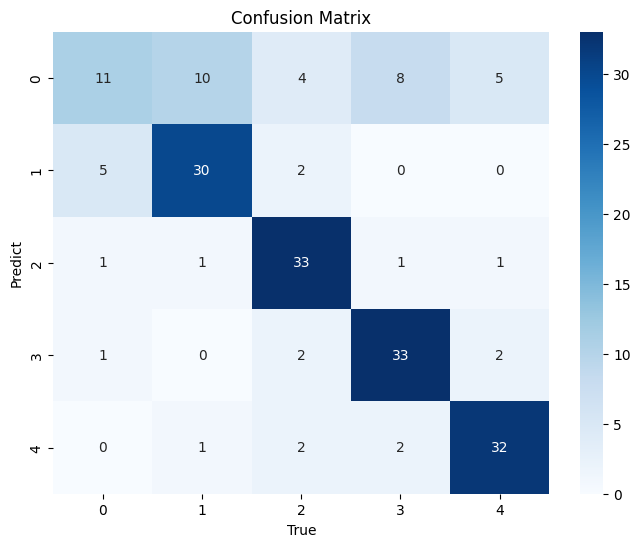

In [61]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun

In [62]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred_rf = rf_model.predict(X_test) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.86      0.86      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [64]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


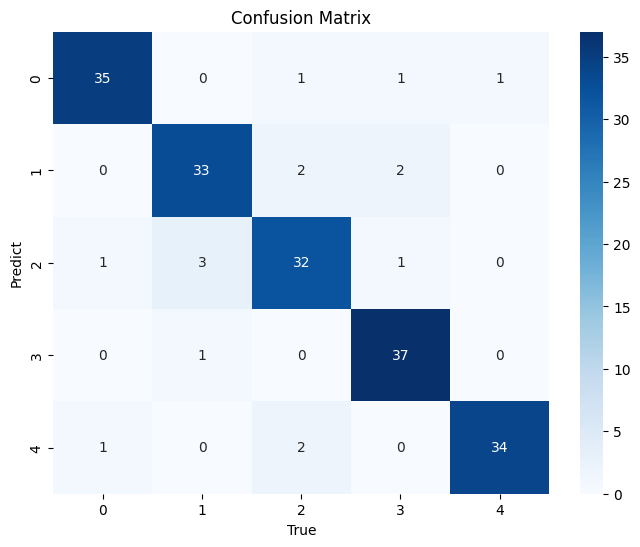

In [65]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [66]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")


Accuracy: 0.898
Classification Report:


In [68]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


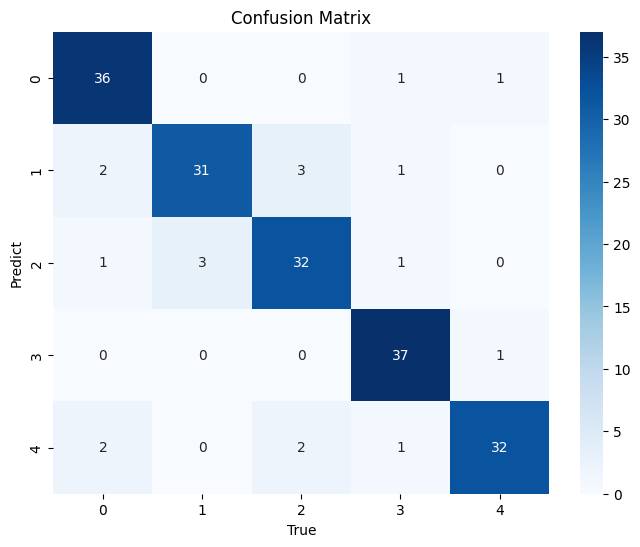

In [69]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Oversample + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

### KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [72]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80        38
         1.0       0.74      0.78      0.76        37
         2.0       0.85      0.89      0.87        37
         3.0       0.87      0.87      0.87        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.84       187
   macro avg       0.84      0.84      0.84       187
weighted avg       0.84      0.84      0.84       187



In [73]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.84, 'recall': 0.84, 'F1 score': 0.839, 'Precision score': 0.841}


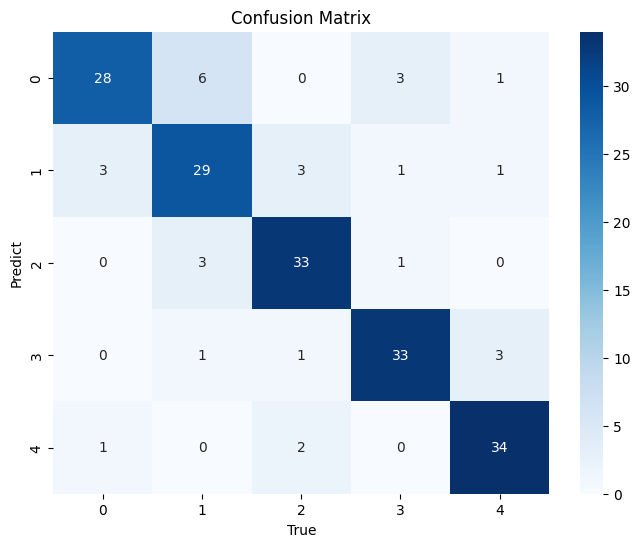

In [74]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Random Forest

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [76]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.89      0.89      0.89        37
         2.0       0.86      0.86      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [77]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


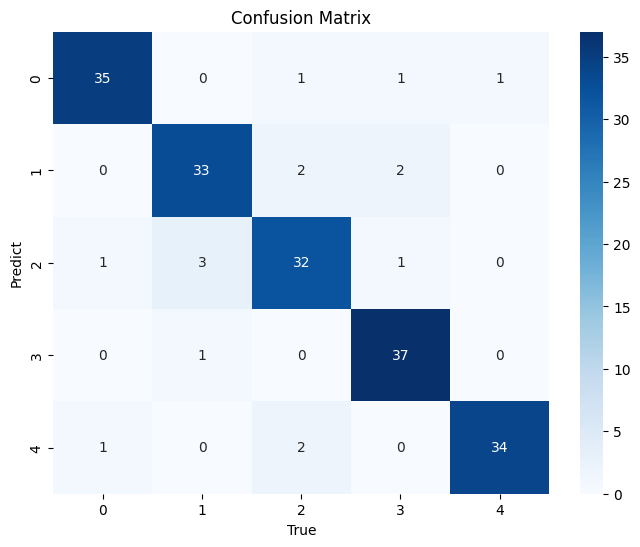

In [78]:
cm = confusion_matrix(y_test_normal, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### XGBOOST

In [79]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.84      0.87        37
         2.0       0.86      0.86      0.86        37
         3.0       0.90      0.97      0.94        38
         4.0       0.94      0.86      0.90        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [81]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.9}


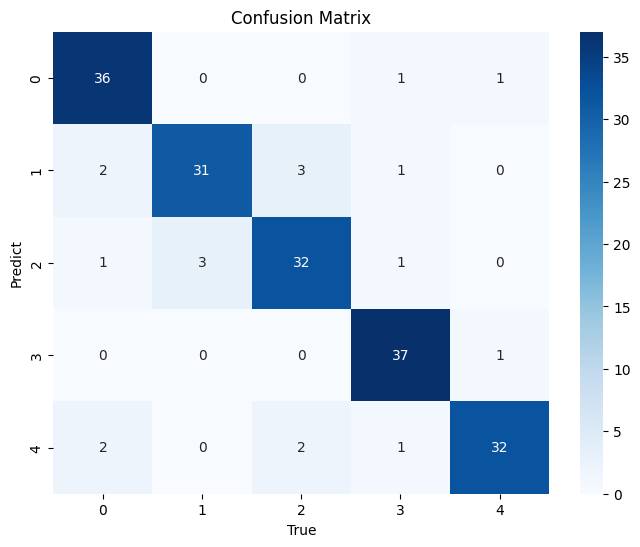

In [82]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.

### KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [84]:
knn_model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 56, 'algorithm': 'auto'}


In [85]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86        38
         1.0       0.85      0.78      0.82        37
         2.0       0.85      0.92      0.88        37
         3.0       0.94      0.89      0.92        38
         4.0       0.86      1.00      0.92        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [86]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.881, 'Precision score': 0.884}


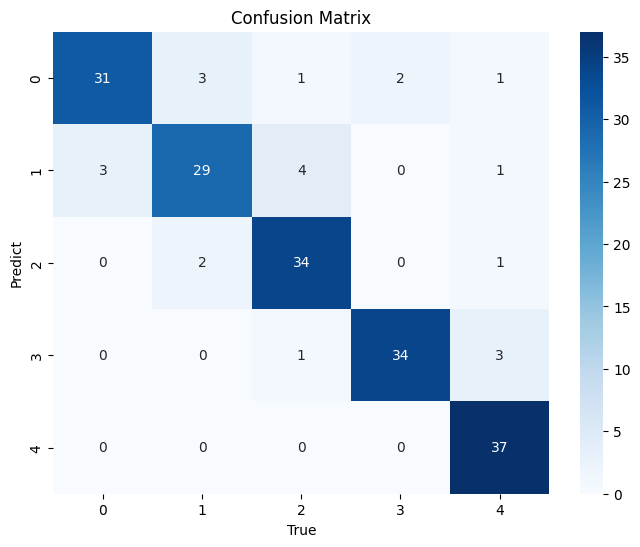

In [87]:
cm = confusion_matrix(y_test_normal, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### Random Forest

In [88]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [89]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.87      0.92      0.89        37
         3.0       0.90      0.95      0.92        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [90]:

evaluation(y_test_normal,y_pred_rf)


{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.905}


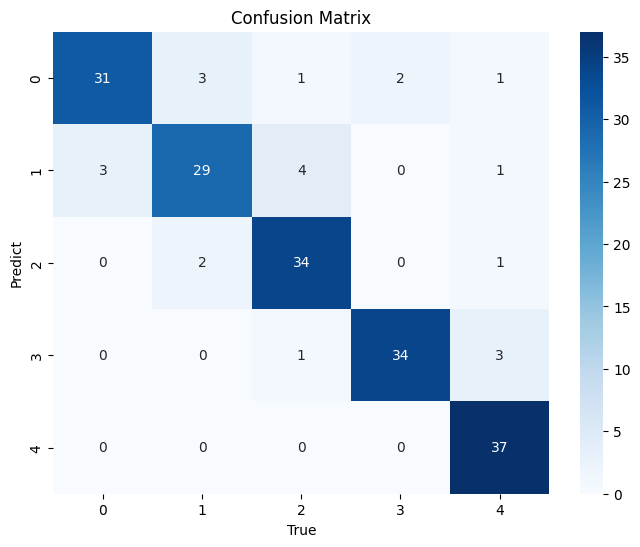

In [91]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### XGBOOST

In [92]:
xgb_model = XGBClassifier()
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [93]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        38
         1.0       0.89      0.84      0.86        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.86      0.90        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [94]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.899}


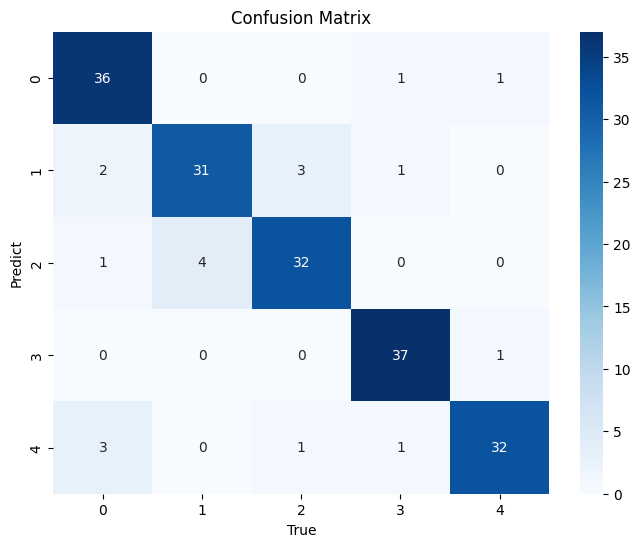

In [95]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### 8) Evaluasi

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [111]:
import matplotlib.pyplot as plt

In [99]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,74.3
1,Random Forest,91.4
2,XGBoost,89.8


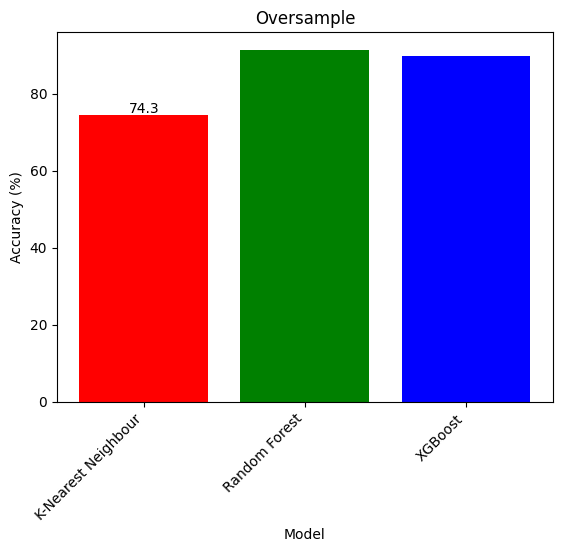

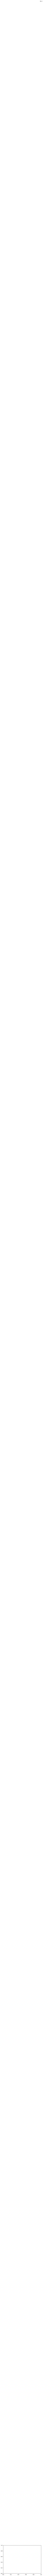

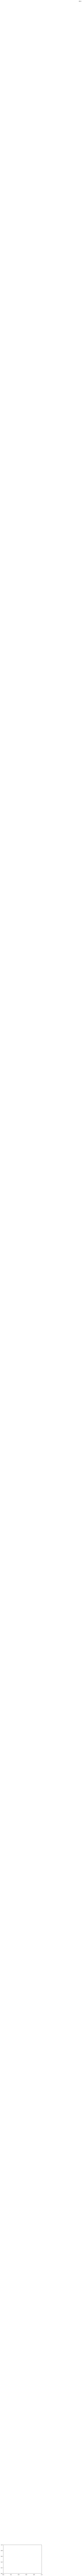

In [123]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  plt.show()


In [124]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()


,Model,Accuracy
0,K-Nearest Neighbour,84.0
1,Random Forest,91.4
2,XGBoost,89.8


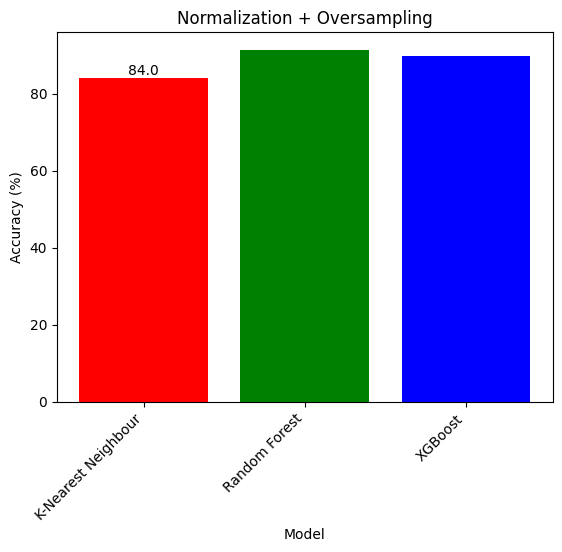

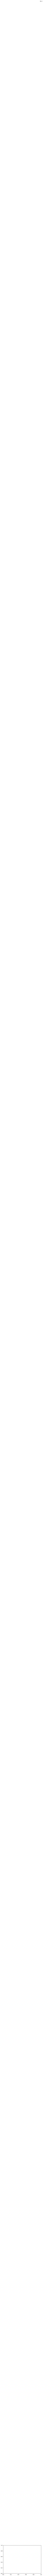

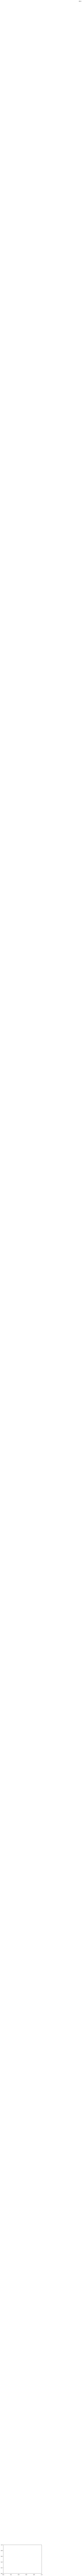

In [125]:
# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  plt.show()


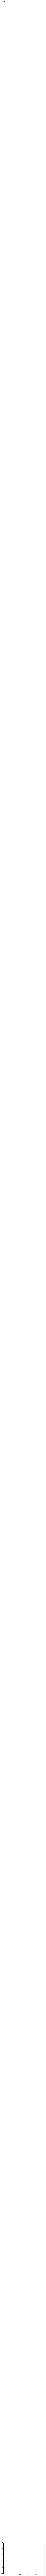

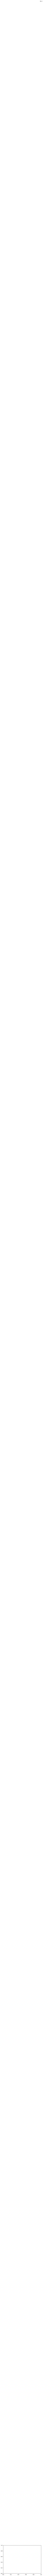

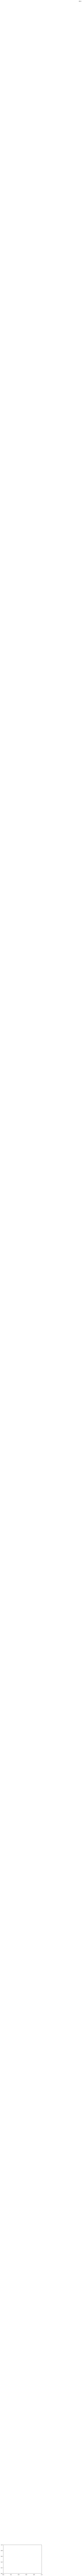

In [126]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
  plt.show()


In [119]:
# Data frame
model_compBest = pd.DataFrame

TypeError: 'type' object is not subscriptable

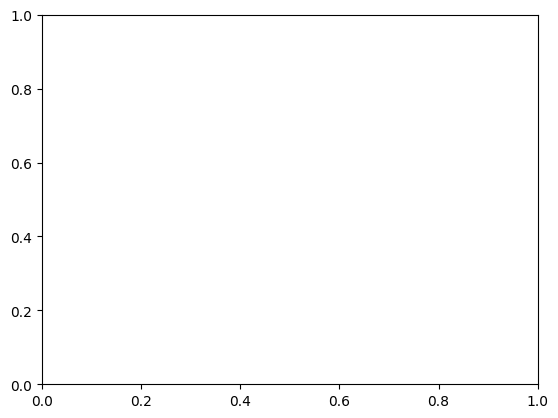

In [129]:
# Membuat bar plot dengan keterangan jumlah
fig,ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
yval = bar.get_height()
plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


### 9) Streamlit

### 10) Kesimpulan

Dari hasil penelitian yang disebutkan, beberapa langkah dilakukan dalam pengolahan data dan pembuatan model klasifikasi. Langkah-langkah tersebut mencakup:
  1) Pengumpulan Data   
  2) Menelaah Data
  3) Validasi Data
  4) Menetukan Object Data   
  5) Membersihkan Data
  6) Konstruksi Data   
  7) Modelling

Adapun pemodelan yang digunakan menggunakan berbagai ALgoritma yang diantaranya adalah K-Nearest Neighbour (KNN), Random Forest, dan XGBoost. Yang merupakan langkah awal untuk memahami bagaimana setiap algoritma berperilaku dalam menangani data dan membuat prediksi.Langkah awal mencakup penanganan ketidakseimbangan data dengan menggunakan teknik random over sampling SMOTE guna meningkatkan keseimbangan antara kelas mayoritas dan minoritas dalam dataset. Selain itu, proses normalisasi data dilakukan untuk memastikan konsistensi skala pada fitur-fitur yang digunakan. Dilakukan juga proses tuning parameter pada masing-masing algoritma menggunakan RandomSearchCV untuk mencari kombinasi parameter yang optimal agar model dapat lebih baik dalam melakukan prediksi. Hasil dari pengujian menunjukkan bahwa klasifikasi menggunakan Random Over Sa,pling SMOTE pada model KNN menghasilkan akurasi sebesar 75.4%, model Random Forest dengan akurasi 92%, dan model XGBoots mencapai 90.4%. Kemudian, saat menggunakan data yang sudah dinormalisasi dan Random Over Sampling SMOTE pada model KNN, terjadi pennigkatan akurasi menjadi 86.1%, sedangkan pada model Random Forest dan XGBoots tidak ada perubahan signifikan dalam akurasi. Namun, setelah dilakukan tuning menggunakan RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE, terjadi peningkatan signifikan pada model KNN mencapai akurasi 93%, sedangkan pada model Random Forest mengalami penurunan akurasi menjadi 87.7%, dan model XGBoots tetap konsisten dengan akurasi 92%. Secara keseluruhan, penanganan ketidaksiembangan data dengan menggunakan kombinasi metode oversampling, tuning parameter, dan normalisasi menunjukkan dampak yang signifikan terhadap performa model klasifikasi, khususnya pada model KNN dan XGBoots. Ini menekankan pentingnya pemilihan model terbaik dan parameter yang optimal untuk meningkatkan akurasi dan kinerja model secara keseluruhan dalam menangani ketidakseimbangan data.

